<a href="https://www.youtube.com/watch?v=EHtHF9Kvm0Y&list=PLxqBkZuBynVTn2lkHNAcw6lgm1MD5QiMK&index=28&ab_channel=Rohan-Paul-AI"><h1 style="font-size:250%; font-family:cursive; color:#ff6666;"><b>Link YouTube Video - LongFormer with Tensorflow | NER</b></h1></a>

[![IMAGE ALT TEXT](https://imgur.com/h7u2oId.png)](https://www.youtube.com/watch?v=EHtHF9Kvm0Y&list=PLxqBkZuBynVTn2lkHNAcw6lgm1MD5QiMK&index=28&ab_channel=Rohan-Paul-AI "")


---------------------

## [Kaggle - Feedback Prize - Evaluating Student Writing](https://www.kaggle.com/competitions/feedback-prize-2021)

### You can run this Notebook either Locally or in Kaggle - Just modify the 'ROOT_DIR' variable to properly refer to the dataset

## The classification Problem in this competition

Basically, we have a bunch of essays written by kids in the age range of about 12-18 years old in which we have to find word sequences that can be classified as one of 7 "discourse types", which are

* Lead - an introduction that begins with a statistic, a quotation, a description, or some other device to grab the reader’s attention and point toward the thesis
  Interestingly, this is not present in all the the training set data. Around 40% of the ids do not have a lead!

* Position - an opinion or conclusion on the main question
  Almost all the training data has a Position. However, it is not always at the beginning. 

* Claim - a claim that supports the position
  Almost all the training data has a Claim. One training set data has 12 Claims!! Over half have at least 3 claims

* Counterclaim - a claim that refutes another claim or gives an opposing reason to the position

* Rebuttal - a claim that refutes a counterclaim

* Evidence - ideas or examples that support claims, counterclaims, or rebuttals.

* Concluding Statement - a concluding statement that restates the claims

So basically, we are tasked with giving feedback on argumentative essays written by students. Specifically, our task is to predict the human annotations.

This annotation will be done in 2 steps:

### - Segment each essay into discrete, rhetorical and argumentative elements (i.e., discourse elements) .

### - Classify each element as one of 7 "discourse types",

## Basics on the training data

We have a bunch of text files and a separate train.csv with labels. 

In the csv, we get reference to the text files, and then multiple lines per text file with spans indicating a specific discourse type.

The Ground Truth here is a combination of the discourse type and the prediction string. 

Here, Kaggle provides labels as characters (discourse start, discourse end) or words (predictionstring). 

--------------

train.csv - a .csv file containing the annotated version of all essays in the training set


* **discourse_id** - discourse_id is a unique identifier for each discourse element. Basically, each row in train.csv contains one discourse element, and the discourse_id is what identifies each of these discourse elements.

It is different to the 'id' column in that 'id' is the identifier of the full student essay that the discourse element came from. So multiple rows can have the same value for 'id'. On the other hand, each row in train.csv will have a different value for 'discourse_id', since each row is a different discourse element.

Hope that helps and let me know if it's still unclear.

* **discourse_start** - character position where discourse element begins in the essay response

* **discourse_end** - character position where discourse element ends in the essay response

* **discourse_text** - text of discourse element

* **discourse_type** - classification of discourse element

* **discourse_type_num** - enumerated class label of discourse element

* **predictionstring** - the word indices of the training sample, as required for predictions

The **predictionstring** corresponds to - the index of the words in the essay and the predicted discourse type for this sequence of words, SHOULD be correct. 

There can be partial matches, if the correct discourse type is predicted but on a longer or shorter sequence of words than specified in the Ground Truth.

https://www.kaggle.com/code/erikbruin/nlp-on-student-writing-eda

------------------------------------

## Evaluation Metric - Overlap Concept in this competition

### 1. As per the Evaluation page - "If the overlap between the ground truth and prediction is >= 0.5, and the overlap between the prediction and the ground truth >= 0.5, the prediction is a match and considered a true positive. If multiple matches exist, the match with the highest pair of overlaps is taken."

The **"overlap between the ground truth and prediction"** is a measure of how many words in the ground truth match the predicted words. It is calculated as the number of words that appear in both the ground truth and the prediction divided by the total number of words in the ground truth. 

For example, if the ground truth for a sample contains 10 words and the model predicts 8 of those words correctly, the overlap between the ground truth and prediction would be 0.8 or 80%.

On the other hand, the **"overlap between the prediction and the ground truth"** is a measure of how many words in the prediction match the words in the ground truth. It is calculated as the number of words that appear in both the ground truth and the prediction divided by the total number of words in the prediction. 

For example, if the model predicts 12 words for a sample and 10 of those words match the words in the ground truth, the overlap between the prediction and ground truth would be 0.83 or 83%.

Example:
Ground truth: 1 2 3 4 5
Prediction: 1 2 3

Common indices: 1 2 3 (3 common indices)

- overlap between the ground truth and prediction: 3 common indices / 5 ground truth indices = 0.6 (>= 0.5)

- overlap between the prediction and the ground truth: 3 common indices / 3 prediction indices = 1.0 (>= 0.5)

Since both overlaps are greater than or equal to 0.5, this prediction is considered a match (true positive).

### 2. In both, the numerator is the size of the intersection. Both calculations have to be at least 0.5 for the prediction to be considered a hit.

These two measures are used together to determine whether a prediction is a true positive or not. 

By using both measures, the evaluation metric ensures that the predicted words are not only present in the ground truth, but also that the ground truth words are correctly identified by the model.

In some cases, there might be multiple matches (multiple predictions with an overlap >= 0.5). If this happens, the competition rules state that the match with the highest pair of overlaps is considered.

### 3. "If multiple matches exist, the match with the highest pair of overlaps is taken" - 

This statement means that if there are several predictions that match a single ground truth, only the prediction with the highest overlaps (for both ground truth and prediction) will be considered a true positive.

Example:
Ground truth: 1 2 3 4 5
Prediction 1: 1 2 3
Prediction 2: 1 2 3 4

In this example, both predictions match the ground truth. However, Prediction 2 has a higher overlap and will be considered the true positive. Prediction 1 will not be considered.

### 4. "Any unmatched ground truths are false negatives and any unmatched predictions are false positives."


This statement means that any ground truth without a corresponding matching prediction is considered a false negative (missed correct prediction), and any prediction without a corresponding matching ground truth is considered a false positive (incorrect prediction).

Example:
Ground truth: 1 2 3 4 5
Prediction: 1 2

Since the overlaps are not >= 0.5 for both ground truth and prediction, this prediction is considered a false positive. And since there's no match for the ground truth, it's considered a false negative.

A basic implementation of the above concept will like below 

Below code is just for clarification of the concept, as for implementations for this project, I will use a slightly different version of this code later.

```py

def calculate_overlap(ground_truth, prediction):
    ground_truth_set = set(ground_truth)
    prediction_set = set(prediction)
    
    intersection = ground_truth_set.intersection(prediction_set)
    overlap_ground_truth = len(intersection) / len(ground_truth_set)
    overlap_prediction = len(intersection) / len(prediction_set)
    
    return overlap_ground_truth, overlap_prediction

def evaluate_overlap(ground_truth, prediction):
    overlap_ground_truth, overlap_prediction = calculate_overlap(ground_truth, prediction)
    
    if overlap_ground_truth >= 0.5 and overlap_prediction >= 0.5:
        return "True Positive"
    elif overlap_ground_truth < 0.5:
        return "False Negative"
    elif overlap_prediction < 0.5:
        return "False Positive"

# Example usage
ground_truth = [1, 2, 3, 4, 5]
prediction = [1, 2, 3]

result = evaluate_overlap(ground_truth, prediction)
print(result)  # Output: True Positive


```

In [1]:
import warnings
warnings.filterwarnings('ignore')

import os

import pandas as pd, numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter

os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3'

import plotly.express as px
import plotly.graph_objects as go

from pathlib import Path
import spacy
from spacy import displacy

from transformers import *

from transformers import AutoTokenizer, AutoConfig, TFAutoModel

from train import *
from util import *

print('TF version',tf.__version__)


TF version 2.10.1


In [2]:

# set number of gpus you wish to use. 
os.environ["CUDA_VISIBLE_DEVICES"]="0" #0,1 for 2 gpus if you are using Kaggle's 2 GPUs

# ROOT_DIR = '../input/feedback-prize-2021/' # Directory when running in Kaggle
ROOT_DIR = '../input/' # local machine's directory 

MODEL_NAME = 'allenai/longformer-base-4096'

## In tensorflow what is os.environ\["CUDA\_VISIBLE\_DEVICES"\]

`os.environ["CUDA_VISIBLE_DEVICES"]` is an environment variable used in TensorFlow to specify which GPUs to use for computation.

When a TensorFlow is run on a system with multiple GPUs, `os.environ["CUDA_VISIBLE_DEVICES"]` can be set to a comma-separated list of integers representing the GPU IDs that the program is allowed to use.

For example, if you have two GPUs and you want to use only the first GPU for computation, you can set `os.environ["CUDA_VISIBLE_DEVICES"] = "0"` before running your TensorFlow program.

This is useful in situations where you want to run multiple TensorFlow programs on the same system, each using a different set of GPUs, without having them interfere with each other.

In [3]:
train = pd.read_csv(ROOT_DIR + 'train.csv')

print( train.shape )
train.head()

(1251, 8)


,id,discourse_id,discourse_start,discourse_end,discourse_text,discourse_type,discourse_type_num,predictionstring
0,423A1CA112E2,1.622630e+12,8,229,Modern humans today are always on their phone....,Lead,Lead 1,1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 1...
1,423A1CA112E2,1.622630e+12,230,312,They are some really bad consequences when stu...,Position,Position 1,45 46 47 48 49 50 51 52 53 54 55 56 57 58 59
2,423A1CA112E2,1.622630e+12,313,401,Some certain areas in the United States ban ph...,Evidence,Evidence 1,60 61 62 63 64 65 66 67 68 69 70 71 72 73 74 75
3,423A1CA112E2,1.622630e+12,402,758,"When people have phones, they know about certa...",Evidence,Evidence 2,76 77 78 79 80 81 82 83 84 85 86 87 88 89 90 9...
4,423A1CA112E2,1.622630e+12,759,886,Driving is one of the way how to get around. P...,Claim,Claim 1,139 140 141 142 143 144 145 146 147 148 149 15...


## First, lets check if the discourse_text and the predictionstring always have the same number of words (because ideally they should).

In [4]:
train["discourse_len"] = train["discourse_text"].apply(lambda x: len(x.split()))
train["pred_len"] = train["predictionstring"].apply(lambda x: len(x.split()))


cols_to_display = ['discourse_id', 'discourse_text', 'discourse_type','predictionstring', 'discourse_len', 'pred_len']
train[cols_to_display].head()

,discourse_id,discourse_text,discourse_type,predictionstring,discourse_len,pred_len
0,1.622630e+12,Modern humans today are always on their phone....,Lead,1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 1...,44,44
1,1.622630e+12,They are some really bad consequences when stu...,Position,45 46 47 48 49 50 51 52 53 54 55 56 57 58 59,15,15
2,1.622630e+12,Some certain areas in the United States ban ph...,Evidence,60 61 62 63 64 65 66 67 68 69 70 71 72 73 74 75,16,16
3,1.622630e+12,"When people have phones, they know about certa...",Evidence,76 77 78 79 80 81 82 83 84 85 86 87 88 89 90 9...,63,63
4,1.622630e+12,Driving is one of the way how to get around. P...,Claim,139 140 141 142 143 144 145 146 147 148 149 15...,24,24


## Below we find 468 instances of discourses where this equality is NOT matched (by one word)

And you can find the reason in discussion topic: [Mystery Solved - Discrepancy Between PredictionString and DiscourseText](https://www.kaggle.com/c/feedback-prize-2021/discussion/297591)

In [5]:
print(f"The total number of discourses is {len(train)}")

train.query('discourse_len != pred_len')[cols_to_display]
# The df.query function allows you to filter rows of the DataFrame based on a query expression written as a string. It provides a more concise and readable syntax compared to traditional boolean indexing and is particularly helpful when working with large DataFrames.
# with the above line I filter rows of the DataFrame where the value in the 'discourse_len' column is not equal to the value in the 'pred_len' column.
# The result will be a new DataFrame containing only the specified columns (i.e. `cols_to_display`) for the rows that meet the condition in the query function.

The total number of discourses is 1251


,discourse_id,discourse_text,discourse_type,predictionstring,discourse_len,pred_len
107,1.622470e+12,if we would just make stricker laws for phone ...,Concluding Statement,303 304 305 306 307 308 309 310 311 312 313 31...,19,18
1025,1.622560e+12,for navigation to wherever they are going,Claim,105 106 107 108 109 110 111 112,7,8


## Length and frequency and relative position per discourse_type

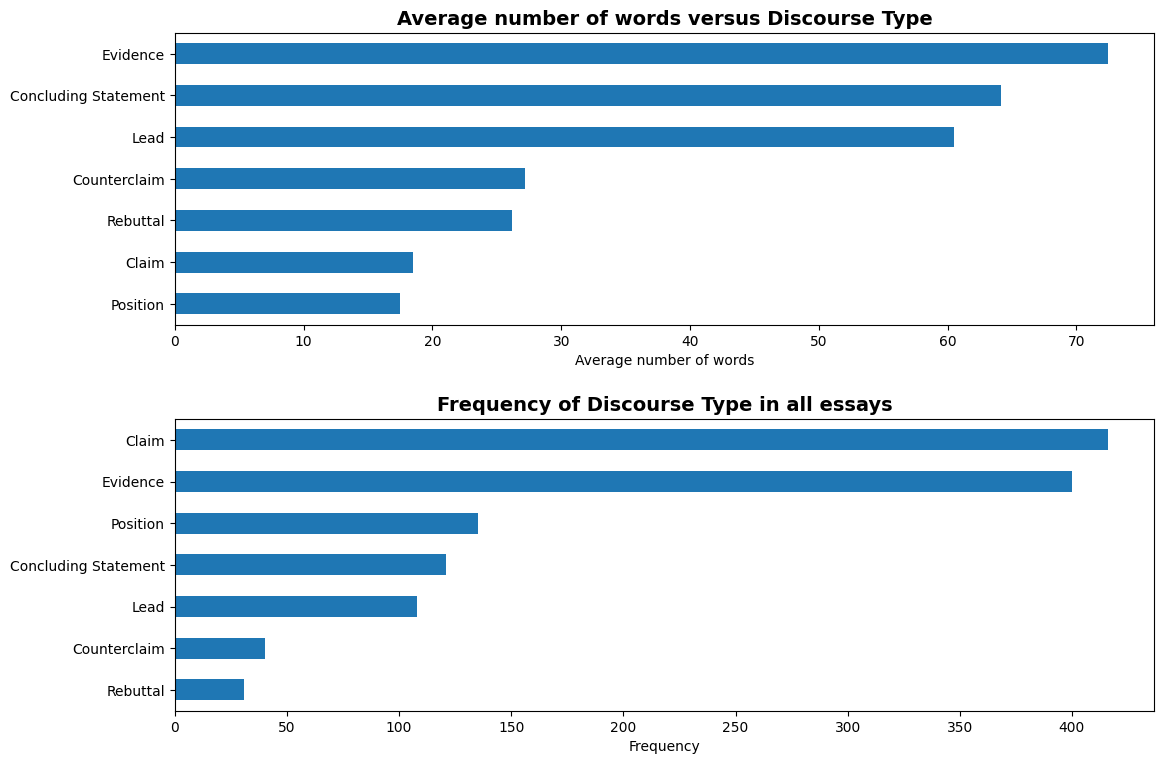

In [6]:
fig = plt.figure(figsize=(12,8))

ax1 = fig.add_subplot(211)
ax1 = train.groupby('discourse_type')['discourse_len'].mean().sort_values().plot(kind="barh")
ax1.set_title("Average number of words versus Discourse Type", fontsize=14, fontweight = 'bold')
ax1.set_xlabel("Average number of words", fontsize = 10)
ax1.set_ylabel("")

ax2 = fig.add_subplot(212)
ax2 = train.groupby('discourse_type')['discourse_type'].count().sort_values().plot(kind="barh")
ax2.get_xaxis().set_major_formatter(FuncFormatter(lambda x, p: format(int(x), ','))) #add thousands separator
ax2.set_title("Frequency of Discourse Type in all essays", fontsize=14, fontweight = 'bold')
ax2.set_xlabel("Frequency", fontsize = 10)
ax2.set_ylabel("")

plt.tight_layout(pad=2)
plt.show()

Looking at the above graph, is there a correlation between the length of a discourse and the class (discourse_type)? Yes, there is. Evidence is the longest discourse type on average. 

When looking at the frequencies of occurence, we see that Counterclaim and Rebuttal are relatively rare

## Plotting Discourse type against Number of Rows

In [7]:
fig = px.bar(x = np.unique(train["discourse_type"]),

y = [list(train["discourse_type"]).count(i) for i in np.unique(train["discourse_type"])] , 
            color = np.unique(train["discourse_type"]),
             color_continuous_scale="Emrld") 

fig.update_xaxes(title="Classes")

fig.update_yaxes(title = "Number of Rows")

fig.update_layout(showlegend = True,
    title = {
        'text': 'Discourse Type Distribution ',
        'y':0.95,
        'x':0.5,
        'xanchor': 'center',
        'yanchor': 'top'},
        template="plotly_white")

fig.show()

## Generate a visualization of a text file with annotated discourse segments, using Spacy and the `displacy.render` function.

In [8]:
path = Path(ROOT_DIR+'train')

examples = train['id'].sample(n=5, random_state=42).values.tolist()

for ex in examples:
    displacy_discourse_type_visualize(ex, train, path)
    print('\n')

In [9]:
!nvidia-smi

Tue Mar 21 14:39:43 2023       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 528.49       Driver Version: 528.49       CUDA Version: 12.0     |
|-------------------------------+----------------------+----------------------+
| GPU  Name            TCC/WDDM | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  NVIDIA GeForce ... WDDM  | 00000000:01:00.0  On |                  N/A |
| 65%   49C    P8    16W / 170W |    641MiB / 12288MiB |      9%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [10]:
tokenizer = AutoTokenizer.from_pretrained(MODEL_NAME)

config = AutoConfig.from_pretrained(MODEL_NAME) 

backbone = TFAutoModel.from_pretrained(MODEL_NAME, config=config)

Could not locate the tokenizer configuration file, will try to use the model config instead.
loading configuration file config.json from cache at C:\Users\PC60/.cache\huggingface\hub\models--allenai--longformer-base-4096\snapshots\7a2d50a05513897192e79ea7c750493795d7cec0\config.json
Model config LongformerConfig {
  "_name_or_path": "allenai/longformer-base-4096",
  "attention_mode": "longformer",
  "attention_probs_dropout_prob": 0.1,
  "attention_window": [
    512,
    512,
    512,
    512,
    512,
    512,
    512,
    512,
    512,
    512,
    512,
    512
  ],
  "bos_token_id": 0,
  "classifier_dropout": null,
  "eos_token_id": 2,
  "gradient_checkpointing": false,
  "hidden_act": "gelu",
  "hidden_dropout_prob": 0.1,
  "hidden_size": 768,
  "ignore_attention_mask": false,
  "initializer_range": 0.02,
  "intermediate_size": 3072,
  "layer_norm_eps": 1e-05,
  "max_position_embeddings": 4098,
  "model_type": "longformer",
  "num_attention_heads": 12,
  "num_hidden_layers": 12,
 

In [11]:
strategy = multi_gpu_use()

single strategy


# Enable Mixed precision

When using Kaggle's P100 GPU, mixed precision does not make a difference. However, if you run this code locally on a recent GPU, using mixed precision, get speed up train time by as much as 2x.

Mixed-precision training is a technique for training deep neural networks using both lower-precision (e.g., half-precision) and higher-precision (e.g., single-precision) floating-point numbers. This technique can lead to significant speedups in training and can reduce memory usage, especially when training large models with many layers.

This line of code, the "auto_mixed_precision" option enables TensorFlow to automatically select the best precision format for each tensor during training, based on the tensor's dynamic range - without requiring manual specification of precision formats for each tensor, which can be time-consuming and error-prone.

Further, mixed-precision training can also improve the numerical stability of the training process. Specifically, using lower-precision numbers can help avoid numerical underflow, which can occur when using single-precision numbers in deep neural networks with many layers. By using mixed-precision training, the numerical stability of the training process can be improved without sacrificing performance.

However, it’s important to note that not all hardware supports mixed-precision training, and not all models may benefit from it. Therefore, it’s important to experiment with different precision formats and configurations to determine the optimal approach for a particular model and hardware setup.

In [12]:
tf.config.optimizer.set_experimental_options({"auto_mixed_precision": True})

In [13]:
print('The train labels are:')
train.discourse_type.unique()

The train labels are:


array(['Lead', 'Position', 'Evidence', 'Claim', 'Concluding Statement',
       'Counterclaim', 'Rebuttal'], dtype=object)

In [14]:
unique_doc_ids = train.id.unique()

print('There are',len(unique_doc_ids),'train texts.')

There are 136 train texts.


# Tokenize Train

Code in the next cell is for converting Kaggle's train dataset into a NER token array that we can use to train a NER transformer. 


---------------------

## B_ and I_ are used to indicate the boundary of a named entity.

In NER, the prefix B_ is used to indicate the beginning of a named entity, and is typically followed by a label indicating the type of entity (e.g. B_PERSON for the first token in a person's name). The prefix I_ is used to indicate tokens that are inside a named entity, and is also followed by the entity type (e.g. I_PERSON for the second and subsequent tokens in a person's name). 

In NER, the goal is to identify and classify named entities (such as people, organizations, and locations) in a text. To do this, NER models often assign a label to each token in the input text, indicating whether the token is part of a named entity and, if so, what type of entity it is.

For example, consider the sentence "John Smith is the CEO of Acme Corporation". A NER model might output the following sequence of labels:

```
B_PERSON   I_PERSON    O   O  O   B_ORGANIZATION    I_ORGANIZATION
John      Smith       is  the CEO of              Acme          Corporation
```

Here, B_PERSON and I_PERSON are used to mark the tokens that make up the person's name, while B_ORGANIZATION and I_ORGANIZATION mark the tokens that make up the organization name.

------------------------------------------------

In this NB, the B label is the start and I labels are all the middles and the end. 

Lets take an example below. 

In below, the square brackets designate different tokens. And the total text is 4-sentences long, where sentence-1 is the "position", sentence-2 nothing, sentence-3 is "evidence" and sentence-4 is a another "evidence".

```
[This ][is ][sentence ][one. ][This ][is ][sentence ][two. ][This ][is ][sentence ][three. ][This ][is ][sentence ][four. ]

```
Then the prediction from our model is as follows:

```
[2][3][3][3] [14][14][14][14] [4][5][5][5] [4][5][5][5]

```
Total, there are 16 tokens so our model makes 16 predictions. Each prediction is a softmax class from 0 thru 14. The prediction [2] is position-B, the prediction [3] is position-I. The prediction [14] is O which means it is no class. The prediction [4] is evidence-B, the prediction [5] is evidence-I.

Notice how each span begins with a class-B and continues with class-I. When we see a new class-B, we know that we are starting a new span.

The `calculate_preds()` divides each prediction by 2 and then looks for [1][1.5][1.5][1.5] [7][7][7][7] [2][2.5][2.5][2.5] [2][2.5][2.5][2.5])


-------------------------------------------------

## In below Why do we need 2 arrays for each class? LEAD_b and LEAD_i for example?

Its to capture the start and continuation of tokens. `LEAD_b` is the start token e.g. and `LEAD_i` is every other token including the middle tokens and end token for the LEAD span.

In [15]:
MAX_LEN = 1024
# means that each token array will have a maximum length of 1024 tokens.

# initialize the tokenizer object 
tokenizer = AutoTokenizer.from_pretrained(MODEL_NAME)

train_tokens = np.zeros((len(unique_doc_ids),MAX_LEN), dtype='int32')
# train_tokens array is of shape (len(unique_doc_ids), MAX_LEN). 
# This array will store the tokenized versions of the text documents of train dataset

train_attention = np.zeros((len(unique_doc_ids),MAX_LEN), dtype='int32')
# train_attention has the same shape as train_tokens. 
# This array will store the attention masks for each tokenized document  of train dataset

# Declare 2 arrays for each class
# Threre are a total of 14 classes
B_Lead = np.zeros((len(unique_doc_ids),MAX_LEN))
I_Lead = np.zeros((len(unique_doc_ids),MAX_LEN))

B_Position = np.zeros((len(unique_doc_ids),MAX_LEN))
I_Position = np.zeros((len(unique_doc_ids),MAX_LEN))

B_Evidence = np.zeros((len(unique_doc_ids),MAX_LEN))
Evidence_I = np.zeros((len(unique_doc_ids),MAX_LEN))

B_Claim = np.zeros((len(unique_doc_ids),MAX_LEN))
I_Claim = np.zeros((len(unique_doc_ids),MAX_LEN))

B_Conclusion = np.zeros((len(unique_doc_ids),MAX_LEN))
I_Conclusion = np.zeros((len(unique_doc_ids),MAX_LEN))

B_Counterclaim = np.zeros((len(unique_doc_ids),MAX_LEN))
I_Counterclaim = np.zeros((len(unique_doc_ids),MAX_LEN))

B_Rebuttal = np.zeros((len(unique_doc_ids),MAX_LEN))
I_Rebuttal = np.zeros((len(unique_doc_ids),MAX_LEN))

# lets define some helper vars
train_lens = []

targets_b = [B_Lead, B_Position, B_Evidence, B_Claim, B_Conclusion, B_Counterclaim, B_Rebuttal]

targets_i = [I_Lead, I_Position, Evidence_I, I_Claim, I_Conclusion, I_Counterclaim, I_Rebuttal]

target_id_map = {'Lead':0, 'Position':1, 'Evidence':2, 'Claim':3, 'Concluding Statement':4,
             'Counterclaim':5, 'Rebuttal':6}

Could not locate the tokenizer configuration file, will try to use the model config instead.
loading configuration file config.json from cache at C:\Users\PC60/.cache\huggingface\hub\models--allenai--longformer-base-4096\snapshots\7a2d50a05513897192e79ea7c750493795d7cec0\config.json
Model config LongformerConfig {
  "_name_or_path": "allenai/longformer-base-4096",
  "attention_mode": "longformer",
  "attention_probs_dropout_prob": 0.1,
  "attention_window": [
    512,
    512,
    512,
    512,
    512,
    512,
    512,
    512,
    512,
    512,
    512,
    512
  ],
  "bos_token_id": 0,
  "classifier_dropout": null,
  "eos_token_id": 2,
  "gradient_checkpointing": false,
  "hidden_act": "gelu",
  "hidden_dropout_prob": 0.1,
  "hidden_size": 768,
  "ignore_attention_mask": false,
  "initializer_range": 0.02,
  "intermediate_size": 3072,
  "layer_norm_eps": 1e-05,
  "max_position_embeddings": 4098,
  "model_type": "longformer",
  "num_attention_heads": 12,
  "num_hidden_layers": 12,
 

`targets_b` and `targets_i` arrays are used to store the ground truth labels for the beginning and intermediate tokens of each named entity class in the tokenized input. Each class has its own pair of arrays (`B_*` and `I_*`), with the same shape as `train_tokens` and `train_attention` arrays.
    
Align with tokenized input and attention masks: By having the same shape as `train_tokens` and `train_attention` arrays, the `targets_b` and `targets_i` arrays ensure that the ground truth labels are aligned with the tokenized input and attention masks. This alignment is essential for training the model, as it helps the model learn to map the tokenized input to the correct named entity labels.    

In [16]:
prepare_data(train, unique_doc_ids,train_lens, tokenizer, train_tokens, train_attention, ROOT_DIR, MAX_LEN, target_id_map, targets_b, targets_i)

0 , 100 , 

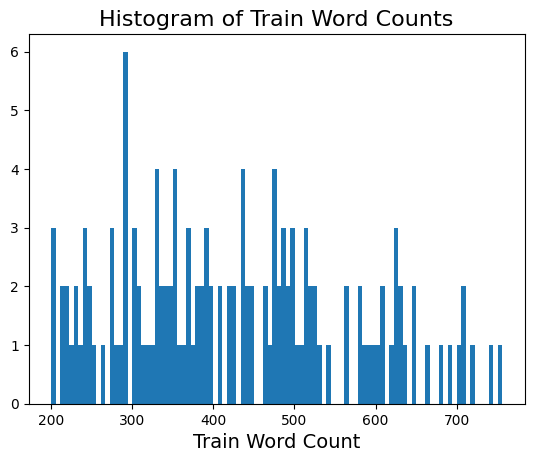

In [17]:
plt.hist(train_lens,bins=100)
# In the prepare_data() method, train_lens is a list that holds the lengths (number of words) of each original text document in the training dataset. The line train_lens.append(len(txt.split())) appends the length of the current document to the train_lens list.
plt.title('Histogram of Train Word Counts',size=16)
plt.xlabel('Train Word Count',size=14)
plt.show()

From the histogram of train word counts above, we see that using a transformer width of 1024 is a good enough for capturing most of the data's signal and also not having too large a model.

We could probably explore other widths between 512 and 1024 also. Or we could use widths of size 512 or smaller and use a stride which breaks a single text into multiple chunks (with possible overlap).

-------------------------------------------------------------------------

## Build a Tensor (with interleaving structure) to represent 15 classes of Targets

Now why do we need 15 classes - Could we not use 8 classes instead of those 15 classes?

Basically, we could use 8 if we do ONLY "IO" NER tagging formats for all the NERs here. 

But we are doing "BIO". So each of the seven classes needs 1 "B" and each of seven classes needs 1 "I" and then the 15th class is "O".

Background on BIO/IO - In an NLP/NER project, IO and BIO are two different tagging formats for tagging tokens in a chunking task. BIO (short for Beginning, Inside, Outside) format is a common tagging format where the B- prefix before a tag indicates that the tag is the beginning of a chunk, and an I- prefix before a tag indicates that the tag is inside a chunk. 
On the other hand, IO (short for Inside, Outside) is another tagging format that is easy to implement but should be worse than IOBES for NER tasks

There are several other tagging formats used in NLP/NER projects. Some of these include IOBES (short for Beginning, Inside, Outside, End, Single) and BILOU (short for Beginning, Inside, Last, Outside, and Unit) . These tagging formats help to distinguish between the end of a named entity and single entities.

In [18]:
#  initializes a 3D NumPy array called targets with zeros
# The purpose of this array is to store target labels for each unique document and for each token (word or character) up to the maximum length (MAX_LEN) specified. The depth of 15 layers is used to store different label information for each token.
targets = np.zeros((len(unique_doc_ids),MAX_LEN,15), dtype='int32')

# In below loop, for each class (k i.e. each of the 7 classes Lead, Position, Evidence, Claim, Conclusion, Counterclaim, and Rebuttal), the code assigns the corresponding "beginning" (targets_b) and "inside" (targets_i) labels to the 'targets' 3D NumPy array in an interleaved fashion. 
# --------------
# For each class, it assigns the "beginning" labels (targets_b) to the even indices (2 * k) and the "inside" labels (targets_i) to the odd indices (2 * k + 1) of the 'targets' array. 
# The result is an interleaved structure that allows for efficient storage and retrieval of target labels for each component during the training and evaluation of the NLP model.
# So, the 'targets' array will store the "beginning" label for class k at depth 2 * k and the "inside" label for class k at depth 2 * k + 1.
for k in range(7):
    targets[:,:,2*k] = targets_b[k]
    targets[:,:,2*k+1] = targets_i[k]
# The for loop iterates 7 times and sets the values of the even-numbered columns (0, 2, 4, etc.) to the values of the targets for the beginning of entities (targets_b) for each entity type. It sets the values of the odd-numbered columns (1, 3, 5, etc.) to the values of the targets for the inside of entities (targets_i) for each entity type.

targets[:,:,14] = 1-np.max(targets,axis=-1)
# Finally, set the values of the last column to 1 minus the maximum value of the targets in the third dimension. This column corresponds to the "outside" of any entities in the text, meaning it is not part of any entity. This is done to ensure that the model can distinguish between entities and non-entities in the text.
# np.max(targets, axis=-1): This calculates the maximum value along the last axis. The axis=-1 notation is shorthand for selecting the last axis.

In [19]:
print("targets :", targets)


targets : [[[0 0 0 ... 0 0 1]
  [0 0 0 ... 0 0 1]
  [0 0 0 ... 0 0 1]
  ...
  [0 0 0 ... 0 0 1]
  [0 0 0 ... 0 0 1]
  [0 0 0 ... 0 0 1]]

 [[0 0 0 ... 0 0 1]
  [0 0 0 ... 0 0 1]
  [0 0 0 ... 0 0 1]
  ...
  [0 0 0 ... 0 0 1]
  [0 0 0 ... 0 0 1]
  [0 0 0 ... 0 0 1]]

 [[0 0 0 ... 0 0 1]
  [0 0 0 ... 0 0 1]
  [0 0 0 ... 0 0 1]
  ...
  [0 0 0 ... 0 0 1]
  [0 0 0 ... 0 0 1]
  [0 0 0 ... 0 0 1]]

 ...

 [[0 0 0 ... 0 0 1]
  [0 0 0 ... 0 0 1]
  [0 0 0 ... 0 0 1]
  ...
  [0 0 0 ... 0 0 1]
  [0 0 0 ... 0 0 1]
  [0 0 0 ... 0 0 1]]

 [[0 0 0 ... 0 0 1]
  [0 0 0 ... 0 0 1]
  [0 0 0 ... 0 0 1]
  ...
  [0 0 0 ... 0 0 1]
  [0 0 0 ... 0 0 1]
  [0 0 0 ... 0 0 1]]

 [[0 0 0 ... 0 0 1]
  [0 0 0 ... 0 0 1]
  [0 0 0 ... 0 0 1]
  ...
  [0 0 0 ... 0 0 1]
  [0 0 0 ... 0 0 1]
  [0 0 0 ... 0 0 1]]]


In [20]:
print("targets.shape :", targets.shape)
# targets.shape : (136, 1024, 15)

targets.shape : (136, 1024, 15)


----------------------

## Why exactly the `targets` array is built like this with even and odd positioning of target labels

Interleaving structures for target labels, like the one used here, are quite common in deep learning NLP projects, particularly for sequence labeling tasks and especially when handling a multi-class problem with multiple entity types.

This structure has a couple of benefits for the NLP/NER model training and evaluation:

**Compact representation**: By interleaving the "beginning" and "inside" labels, the targets array effectively stores information about the named entities in a compact manner. This allows the model to have a single array to reference when it needs information about the labels, simplifying the process of accessing and updating the target labels during training and evaluation.

**Easier indexing:** The even and odd positioning makes it easy to index and retrieve the "beginning" and "inside" labels for a specific argument component. You can directly access the "beginning" label for the k-th component using the index 2 * k and the "inside" label using the index 2 * k + 1. This clear, mathematical relationship between the component index and the target label position simplifies the process of working with the target labels during model training and evaluation.

**Flexibility:** The interleaved structure allows for the possibility of extending the model to support additional types of labels or components in the future. You can add new components by simply extending the depth of the targets array and updating the indices accordingly.

So my final 'target' variable will be of the following form

```
targets = [
    [
        [1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],  # Token 0: B_Lead
        [0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],  # Token 1: I_Lead
        [0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],  # Token 2: B_Position
        [0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],  # Token 3: I_Position
        [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]   # Token 4: No labels
    ],
    [
        [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],  # Token 0: No labels
        [0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0],  # Token 1: B_Evidence
        [0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0],  # Token 2: I_Evidence
        [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],  # Token 3: No labels
        [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0]   # Token 4: B_Conclusion
    ]
]
```

The 15 columns in each innermost array represent the interleaved "beginning" and "inside" labels for the 7 classes or entity-types, as well as an additional column for tokens with no labels (if applicable).

### Why this line is needed - `targets[:,:,14] = 1-np.max(targets,axis=-1)`

The line sets the values of the last column of the targets array to 1 minus the maximum value along the third axis (i.e., the axis representing the 15 entity types). This is done to ensure that there is a "non-entity" label in the target labels.

In NER tasks, the objective is to predict named entities in the input text, and the labels for each token in the text indicate whether it is the beginning or continuation of an entity, or not part of any entity at all. 

In this case, there are 7 entity types, and each entity has a beginning label and a continuation label. That means there are 14 columns of target labels representing the 7 entity types.

The 15th i.e. the last column in targets (i.e., column 14) represents the "non-entity" label. **The values in this column should be 1 if the token is not part of any entity, and 0 otherwise.** 

The expression `1-np.max(targets,axis=-1)` computes the maximum value of the target labels along the third axis, and subtracts it from 1. 

### This means that the value in the "non-entity" column will be 1 if there are no entity labels (i.e., the maximum value is 0), and 0 otherwise.

So overall, by setting the values in the last column of targets to `1 minus the maximum value of the target labels`, the code ensures that there is a "non-entity" label in the targets, and that the model can learn to distinguish between named entities and non-entities in the input text.

In [21]:
np.save(f'targets_{MAX_LEN}', targets)
np.save(f'tokens_{MAX_LEN}', train_tokens)
np.save(f'attention_{MAX_LEN}', train_attention)
print('Saved NER tokens')


Saved NER tokens


# Build Model
We will use LongFormer backbone and add our own NER head using one hidden layer of size 256 and one final layer with softmax. We use 15 classes because we have a `B` class and `I` class for each of 7 labels. And we have an additional class (called `O` class) for tokens that do not belong to one of the 14 classes.

In [22]:
with strategy.scope():
    model = build_model(MODEL_NAME, MAX_LEN)

loading configuration file config.json from cache at C:\Users\PC60/.cache\huggingface\hub\models--allenai--longformer-base-4096\snapshots\7a2d50a05513897192e79ea7c750493795d7cec0\config.json
Model config LongformerConfig {
  "_name_or_path": "allenai/longformer-base-4096",
  "attention_mode": "longformer",
  "attention_probs_dropout_prob": 0.1,
  "attention_window": [
    512,
    512,
    512,
    512,
    512,
    512,
    512,
    512,
    512,
    512,
    512,
    512
  ],
  "bos_token_id": 0,
  "classifier_dropout": null,
  "eos_token_id": 2,
  "gradient_checkpointing": false,
  "hidden_act": "gelu",
  "hidden_dropout_prob": 0.1,
  "hidden_size": 768,
  "ignore_attention_mask": false,
  "initializer_range": 0.02,
  "intermediate_size": 3072,
  "layer_norm_eps": 1e-05,
  "max_position_embeddings": 4098,
  "model_type": "longformer",
  "num_attention_heads": 12,
  "num_hidden_layers": 12,
  "onnx_export": false,
  "pad_token_id": 1,
  "position_embedding_type": "absolute",
  "sep_t

# Train or Load Model

In [23]:
EPOCHS = 4
BATCH_SIZE = 2

# Below learning rates, I am setting only for running the entire NB fast
# For better result, you should experiement with even lower learning rates
LRS = [.0001, .0002]

def learning_func(epoch):
    return LRS[epoch]

lr_callback = tf.keras.callbacks.LearningRateScheduler(learning_func, verbose = True)

In [24]:
# Split the data with train (90%) and valid(10%)
np.random.seed(42)
train_idx = np.random.choice(np.arange(len(unique_doc_ids)),int(0.9*len(unique_doc_ids)),replace=False)

valid_idx = np.setdiff1d(np.arange(len(unique_doc_ids)),train_idx)
# np.setdiff1d() returns an array of indices that are not present in the train_idx array. 

np.random.seed(None)

print('Train size',len(train_idx),', Valid size',len(valid_idx))

Train size 122 , Valid size 14


## Train Model

In [25]:
model.fit(x=[train_tokens[train_idx,], train_attention[train_idx,]],
              y=targets[train_idx,],
              validation_data=([train_tokens[valid_idx,], train_attention[valid_idx,]],
                               targets[valid_idx,]),
              callbacks=[lr_callback],
              epochs=EPOCHS,
              batch_size=BATCH_SIZE,
              verbose=2,
              )
model.save_weights(f'longf_train_model')



Epoch 1: LearningRateScheduler setting learning rate to 0.01.
61/61 - 70s - loss: nan - categorical_accuracy: 0.0083 - val_loss: nan - val_categorical_accuracy: 8.3705e-04 - lr: 0.0100 - 70s/epoch - 1s/step


# Validate Model - Infer OOF
We will now make predictions on the validation texts. Our model makes label predictions for each token, we need to convert this into a list of word indices for each label. Note that the tokens and words are not the same. A single word may be broken into multiple tokens. Therefore we need to first create a map to change token indices to word indices.

In [26]:
p = model.predict([train_tokens[valid_idx,], train_attention[valid_idx,]], 
                  batch_size=16, verbose=2)

print('OOF predictions shape:',p.shape)

oof_preds = np.argmax(p,axis=-1)

1/1 - 13s - 13s/epoch - 13s/step
OOF predictions shape: (14, 1024, 15)


In [37]:
oof_preds.shape

(14, 1024)

## Explanation for `oof_preds = np.argmax(p,axis=-1)`

In the given code snippet for an NER (Named Entity Recognition) / NLP (Natural Language Processing) project, the line `oof_preds = np.argmax(p, axis=-1)` is used for extracting the most likely predicted class for each token in the input sequence.

Let's break down the line and explain each part:

1. `np.argmax()`: will find the index (position) of the maximum value along a specified axis in an array (in this case, the prediction array `p`). The maximum value corresponds to the highest probability of a token belonging to a certain class (e.g., entity type like person, location, organization, etc.).

2. `p`: The prediction array, which has the shape `(number_of_samples, sequence_length, number_of_classes)`. (Refer to the print statement above for `p.shape`)

Each element `p[i, j, k]` represents the probability that the token at position `j` in the input sequence `i` belongs to class `k`.

3. `axis=-1`:By setting `axis=-1`, we're looking for the maximum value along the last axis, which corresponds to the class probabilities. This means we're finding the class with the highest probability for each token in every input sequence.

So, `oof_preds = np.argmax(p, axis=-1)` results in an array with the shape `(number_of_samples, sequence_length)`, where each element `oof_preds[i, j]` is the index (class label) of the most likely class for the token at position `j` in the input sequence `i`.

`oof_preds` will be used in the project to evaluate the model's performance by comparing its predictions with the ground truth labels.

In [27]:
target_id_map_updated = {0: 'Lead', 1: 'Position', 2: 'Evidence', 3: 'Claim',
                         4: 'Concluding Statement', 5: 'Counterclaim', 6: 'Rebuttal', 7: 'blank'}

In [28]:
out_of_fold = calculate_preds(tokenizer, target_id_map_updated, MAX_LEN, ROOT_DIR, text_ids=unique_doc_ids[valid_idx], preds=oof_preds, dataset='train', verbose=True)

out_of_fold.head()

0 , all_predictions  [('019328A0D7A3', 'Lead', '0'), ('019328A0D7A3', 'Lead', '1'), ('019328A0D7A3', 'Lead', '2'), ('019328A0D7A3', 'Lead', '2'), ('019328A0D7A3', 'Lead', '2'), ('019328A0D7A3', 'Lead', '2'), ('019328A0D7A3', 'Lead', '3'), ('019328A0D7A3', 'Lead', '4'), ('019328A0D7A3', 'Lead', '4'), ('019328A0D7A3', 'Lead', '5'), ('019328A0D7A3', 'Lead', '6'), ('019328A0D7A3', 'Lead', '7'), ('019328A0D7A3', 'Lead', '8'), ('019328A0D7A3', 'Lead', '9'), ('019328A0D7A3', 'Lead', '10'), ('019328A0D7A3', 'Lead', '11'), ('019328A0D7A3', 'Lead', '12'), ('019328A0D7A3', 'Lead', '13'), ('019328A0D7A3', 'Lead', '14'), ('019328A0D7A3', 'Lead', '15'), ('019328A0D7A3', 'Lead', '16'), ('019328A0D7A3', 'Lead', '17'), ('019328A0D7A3', 'Lead', '18'), ('019328A0D7A3', 'Lead', '19'), ('019328A0D7A3', 'Lead', '20'), ('019328A0D7A3', 'Lead', '21'), ('019328A0D7A3', 'Lead', '22'), ('019328A0D7A3', 'Lead', '22'), ('019328A0D7A3', 'Lead', '23'), ('019328A0D7A3', 'Lead', '24'), ('019328A0D7A3', 'Lead', '25'), 

,id,class,predictionstring
0,019328A0D7A3,Lead,0
1,019328A0D7A3,Lead,1
2,019328A0D7A3,Lead,2
3,019328A0D7A3,Lead,2
4,019328A0D7A3,Lead,2


In [29]:
print('The following classes are present in out_of_fold preds:')
out_of_fold['class'].unique()

The following classes are present in out_of_fold preds:


array(['Lead'], dtype=object)

# Validation Metric

In [30]:
valid = train.loc[train['id'].isin(unique_doc_ids[valid_idx])]

This line of code is selecting a subset of rows from the 'train' dataframe based on a condition. Specifically, it is selecting the rows where the value in the 'id' column is present in a list of unique document ids that are part of the validation set.

Here's a breakdown of the code:

1. `train['id']` selects the 'id' column from the 'train' dataframe.
2. `unique_doc_ids[valid_idx]` selects a subset of unique document ids from the validation set, based on the indices in the 'valid_idx' list.
3. `train['id'].isin(unique_doc_ids[valid_idx])` creates a boolean Series, which is True for rows where the 'id' value is present in the selected subset of unique document ids.
4. `train.loc[]` selects rows from the 'train' dataframe based on the boolean Series created in the previous step. This creates a new dataframe called 'valid' which contains only the rows from 'train' where the 'id' value is present in the validation set.

In [31]:
f1s = []
CLASSES = out_of_fold['class'].unique()

for c in CLASSES:
    pred_df = out_of_fold.loc[out_of_fold['class']==c].copy()
    gt_df = valid.loc[valid['discourse_type']==c].copy()
    f1 = compute_macro_f1_score(pred_df, gt_df)
    print(c,f1)
    f1s.append(f1)


print('Overall',np.mean(f1s))

Lead 0.0
Overall 0.0


# Infer Test Data
We will now infer the test data and create a submission. Our CV is 0.633, let's see what our LB is!

In [32]:
# GET TEST TEXT IDS
files = os.listdir(ROOT_DIR+'test')

TEST_IDS = [f.replace('.txt','') for f in files if 'txt' in f]

print('There are',len(TEST_IDS),'test texts.')

There are 5 test texts.


In [33]:
# First, converting text into tokens
test_tokens = np.zeros((len(TEST_IDS),MAX_LEN), dtype='int32')
test_attention = np.zeros((len(TEST_IDS),MAX_LEN), dtype='int32')

# I need to read and tokenize the text files before applying the trained model
for id_num in range(len(TEST_IDS)):        
    n = TEST_IDS[id_num]
    name = f'{ROOT_DIR}test/{n}.txt'
    print('name ', name)
    txt = open(name, 'r').read()
    tokens = tokenizer.encode_plus(txt, max_length=MAX_LEN, padding='max_length',
                                   truncation=True, return_offsets_mapping=True)
    test_tokens[id_num,] = tokens['input_ids']
    test_attention[id_num,] = tokens['attention_mask']

name  ../input/test/0FB0700DAF44.txt
name  ../input/test/18409261F5C2.txt
name  ../input/test/D46BCB48440A.txt
name  ../input/test/D72CB1C11673.txt
name  ../input/test/DF920E0A7337.txt


In [34]:
# Finally inference
p = model.predict([test_tokens, test_attention], 
                  batch_size=16, verbose=2)
print('Test predictions shape:',p.shape)
test_preds = np.argmax(p,axis=-1)

1/1 - 0s - 405ms/epoch - 405ms/step
Test predictions shape: (5, 1024, 15)



`test_preds` will be used for the final evaluate of the model's performance by comparing its predictions with the ground truth labels.

# Write Submission CSV

In [35]:
# Calculate the predictions for test files

inference_df = calculate_preds(tokenizer, target_id_map_updated, MAX_LEN, ROOT_DIR, text_ids=TEST_IDS, preds=test_preds, dataset='test', verbose=False)

inference_df.head()

all_predictions  [('0FB0700DAF44', 'Lead', '0'), ('0FB0700DAF44', 'Lead', '1'), ('0FB0700DAF44', 'Lead', '2'), ('0FB0700DAF44', 'Lead', '3'), ('0FB0700DAF44', 'Lead', '3'), ('0FB0700DAF44', 'Lead', '4'), ('0FB0700DAF44', 'Lead', '5'), ('0FB0700DAF44', 'Lead', '6'), ('0FB0700DAF44', 'Lead', '7'), ('0FB0700DAF44', 'Lead', '8'), ('0FB0700DAF44', 'Lead', '9'), ('0FB0700DAF44', 'Lead', '10'), ('0FB0700DAF44', 'Lead', '11'), ('0FB0700DAF44', 'Lead', '12'), ('0FB0700DAF44', 'Lead', '13'), ('0FB0700DAF44', 'Lead', '14'), ('0FB0700DAF44', 'Lead', '15'), ('0FB0700DAF44', 'Lead', '15'), ('0FB0700DAF44', 'Lead', '16'), ('0FB0700DAF44', 'Lead', '16'), ('0FB0700DAF44', 'Lead', '17'), ('0FB0700DAF44', 'Lead', '18'), ('0FB0700DAF44', 'Lead', '19'), ('0FB0700DAF44', 'Lead', '20'), ('0FB0700DAF44', 'Lead', '21'), ('0FB0700DAF44', 'Lead', '22'), ('0FB0700DAF44', 'Lead', '23'), ('0FB0700DAF44', 'Lead', '24'), ('0FB0700DAF44', 'Lead', '24'), ('0FB0700DAF44', 'Lead', '25'), ('0FB0700DAF44', 'Lead', '26'), (

,id,class,predictionstring
0,0FB0700DAF44,Lead,0
1,0FB0700DAF44,Lead,1
2,0FB0700DAF44,Lead,2
3,0FB0700DAF44,Lead,3
4,0FB0700DAF44,Lead,3


In [36]:
# WRITE SUBMISSION CSV
inference_df.to_csv('submission.csv',index=False)